In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 8  # batch size

In [ ]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 94.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 92.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 75.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/MasterCourse/Car Recognizer

/content/drive/My Drive/MasterCourse/Car Recognizer


In [ ]:
doc(search_images_ddg)

In [ ]:
car_labels = [
    "sedan car",
    "suv car",
    "micro car",
    "minivan car",
    "convertible car",
    "hatchback car",
    "truck car",
    "bus car",
    "limousine car",
    "sports car",
    "muscle car"
]
len(car_labels)

In [ ]:
data_path = "data"
if not os.path.exists(data_path):
  os.mkdir(data_path)

for car_type in car_labels:
  dest = f"{data_path}/{car_type}"
  
  if not os.path.exists(dest):
    os.mkdir(dest)

  try:
    car_image_urls = search_images_ddg(car_type)
    download_images(dest, urls= car_image_urls)
  except:
    continue

In [ ]:
images_count = get_image_files(data_path)
images_count

(#2084) [Path('data/sedan car/7e576834-f55f-4f29-92a5-7c016e2a9358.jpg'),Path('data/sedan car/bd41ed83-bce6-45ea-98e4-a3414c57288d.jpg'),Path('data/sedan car/2fb430f4-bb91-4630-a14a-73a8bba2f3fe.jpg'),Path('data/sedan car/71f674d0-8863-4f48-8fa3-15f037b0ad01.jpg'),Path('data/sedan car/86c3ab29-9035-434e-b9e1-1c692211a244.jpg'),Path('data/sedan car/27f55e15-e4c8-4e8a-8cdf-0208d826435a.jpg'),Path('data/sedan car/3f4787f4-21e4-489c-935d-b08f86d00703.jpg'),Path('data/sedan car/03610a13-c8ff-4dc7-abeb-c63e9659454a.jpg'),Path('data/sedan car/bb680ef2-3c09-4b80-a214-e8071988f5c7.jpg'),Path('data/sedan car/1f668431-5c0c-4149-a458-ecad7897743d.jpg')...]

In [ ]:
failed = verify_images(images_count)
failed

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


(#94) [Path('data/sedan car/2fb430f4-bb91-4630-a14a-73a8bba2f3fe.jpg'),Path('data/sedan car/90491292-9efd-4e74-8dae-1c5baa41349a.jpg'),Path('data/sedan car/b061f736-2d1c-43b2-82b9-01cae58c4974.jpg'),Path('data/sedan car/bb9ef2ee-8b0f-4a60-b9b8-4948c3fd29b7.jpg'),Path('data/sedan car/c1bc14a5-0bed-4df5-adbf-b67e184a6b9a.jpg'),Path('data/sedan car/7124c98b-966c-4e67-8c40-6b368222e6d0.jpg'),Path('data/sedan car/88f434fd-8dc1-45bf-952b-8f73e40073dc.jpg'),Path('data/sedan car/90bc0f83-5ecb-4d9a-9348-a990724a1a03.jpg'),Path('data/suv car/51e36660-474c-46b1-b25f-fd2c87e7be34.jpg'),Path('data/suv car/971f070a-c6ee-4402-ae98-c8455f7fbaf1.jpg')...]

In [ ]:
failed.map(Path.unlink)

(#94) [None,None,None,None,None,None,None,None,None,None...]

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.1, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [ ]:
dls = dblock.dataloaders(data_path, bs=bs)

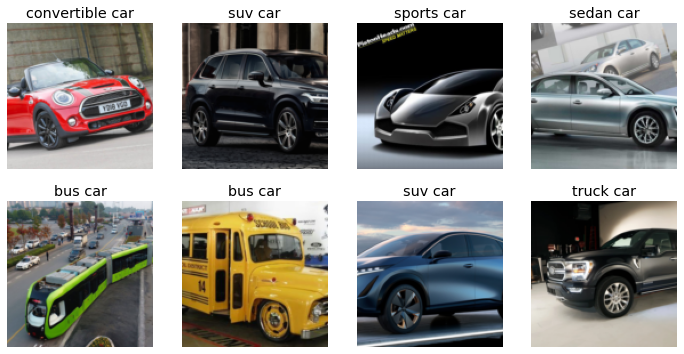

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

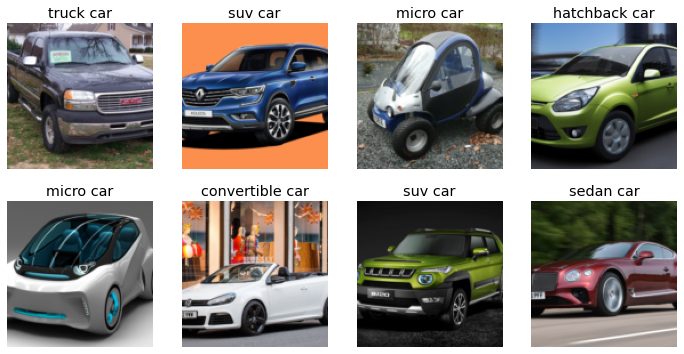

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


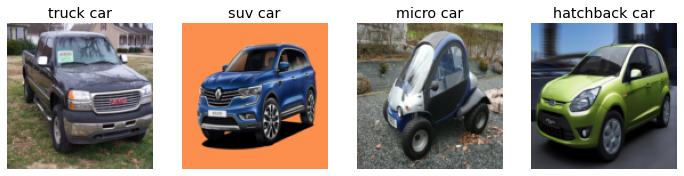

In [ ]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


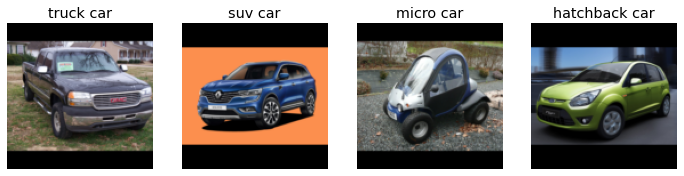

In [ ]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


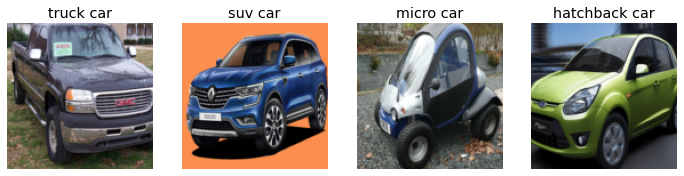

In [ ]:
dblock = dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


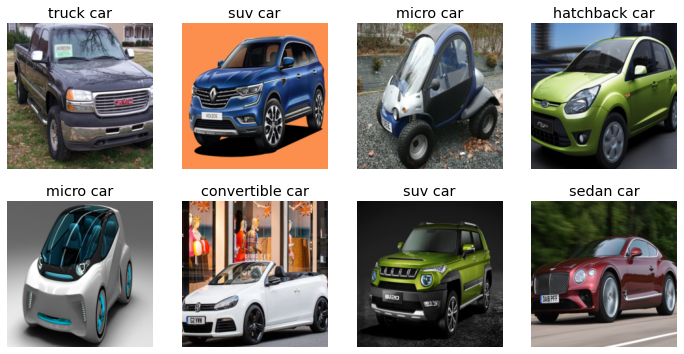

In [ ]:
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=8, nrows=2)

In [ ]:
torch.save(dls, "car_dataloader_v0.pkl")